In [1]:
# Importação das bibliotecas
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import os
import glob
import pathlib
from skimage import filters

In [2]:
def load_data(datadir):
    img_array = []
    path = os.path.join(datadir)
    path_list  = list(os.listdir(path))
    for img in path_list:
        img_array.append(cv2.imread(os.path.join(path, img)))
    return img_array

imgs_seg = load_data('imagens-cor-segmentacao')

In [3]:
img = imgs_seg[0]
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(-0.5, 480.5, 320.5, -0.5)

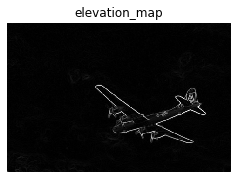

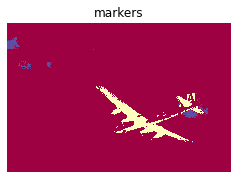

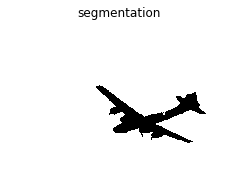

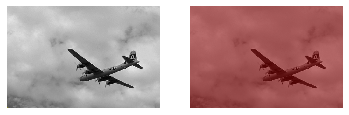

In [16]:
from skimage.filters import sobel
from skimage import morphology
from scipy import ndimage as ndi
from skimage.segmentation import watershed
#from skimage.morphology import watershed

imgs_seg1 = cv2.cvtColor(imgs_seg[3],cv2.COLOR_BGR2GRAY)
elevation_map = sobel(imgs_seg1)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

markers = np.zeros_like(imgs_seg1)
markers[imgs_seg1 < 30] = 1
markers[imgs_seg1 > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.get_cmap("Spectral"), interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

segmentation = watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=imgs_seg1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(imgs_seg1, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
#ax1.set_adjustable('box-forced')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
#ax2.set_adjustable('box-forced')
#fig.subplots_adjust(**margins)